In [ ]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

# Update shooting guess: Algorithmic approach

Define parameters.

In [ ]:
# domain
x_0 = 0
x_f = 1

# boundary conditions
y1_0 = 0
y1_f = 2

Define canonical ODE system.

In [ ]:
def dy(x: float, y: np.ndarray) -> list[float, float]:
    """Examplary ordinary differential equation.

    Parameters
    ----------
    x : float
        Independent variable
    y : np.ndarray
        Dependent variables

    Returns
    -------
    list[float, float]
        First order derivative of dependent variables
    """
    y1, y2 = y
    dy1 = y2
    dy2 = 4*(y1-x)
    return [dy1, dy2]

Find the optimal guess using a root-finding method (see lecture 2).

In [ ]:
def cost_function(guess, x_0, x_f, y1_0, y1_f):
    
    sol = sp.integrate.solve_ivp(dy, (x_0, x_f), [y1_0, guess])
    y1_f_guess = sol.y[0,-1]
    return y1_f_guess - y1_f

initial_guess = 1
root_result = sp.optimize.root_scalar(cost_function, args=(x_0, x_f, y1_0, y1_f), bracket=[-10,10], x0=initial_guess)
opt_guess = root_result.root

Insert the optimal guess in the BVP formulated as an IVP.

In [ ]:
ivp_result = sp.integrate.solve_ivp(dy, (x_0, x_f), [y1_0, opt_guess])

Plot the results.

/tmp/ipykernel_1624/391894950.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


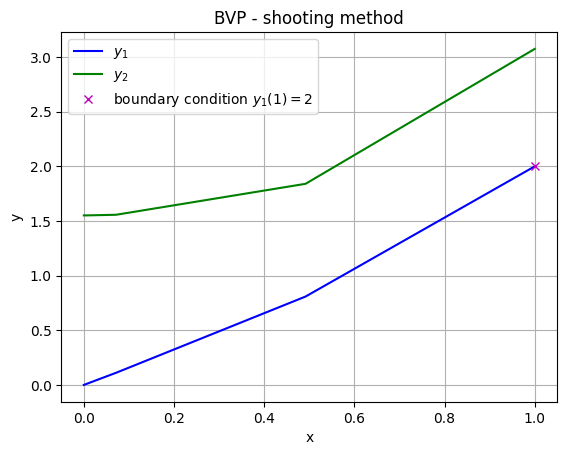

In [ ]:
fig, ax = plt.subplots()
ax.plot(ivp_result.t, ivp_result.y[0], label="$y_1$", color="b")
ax.plot(ivp_result.t, ivp_result.y[1], label="$y_2$", color="g")
ax.plot(1, 2, label="boundary condition $y_1(1)=2$", linestyle="", marker="x", color="m")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("BVP - shooting method")
ax.legend()
ax.grid()
fig.show()